In [1]:
library(reshape2)
library(ggplot2)
library(ggridges)
library(plyr)
library(dplyr)
library(Cairo)
library(matrixStats)
library(forcats)
library(hardhat)
library(grid)
library(gridExtra)
library(egg)
library(stringr)
library(cowplot)
GeomCrossbar$default_aes$lineend = 'butt'


 次のパッケージを付け加えます: ‘dplyr’ 


 以下のオブジェクトは ‘package:plyr’ からマスクされています:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


 以下のオブジェクトは ‘package:stats’ からマスクされています:

    filter, lag


 以下のオブジェクトは ‘package:base’ からマスクされています:

    intersect, setdiff, setequal, union



 次のパッケージを付け加えます: ‘matrixStats’ 


 以下のオブジェクトは ‘package:dplyr’ からマスクされています:

    count


 以下のオブジェクトは ‘package:plyr’ からマスクされています:

    count



 次のパッケージを付け加えます: ‘gridExtra’ 


 以下のオブジェクトは ‘package:dplyr’ からマスクされています:

    combine




In [2]:
data = read.csv("HRR25_orthologs_PPI_screening_parsed_2023-02-17DEY.csv")

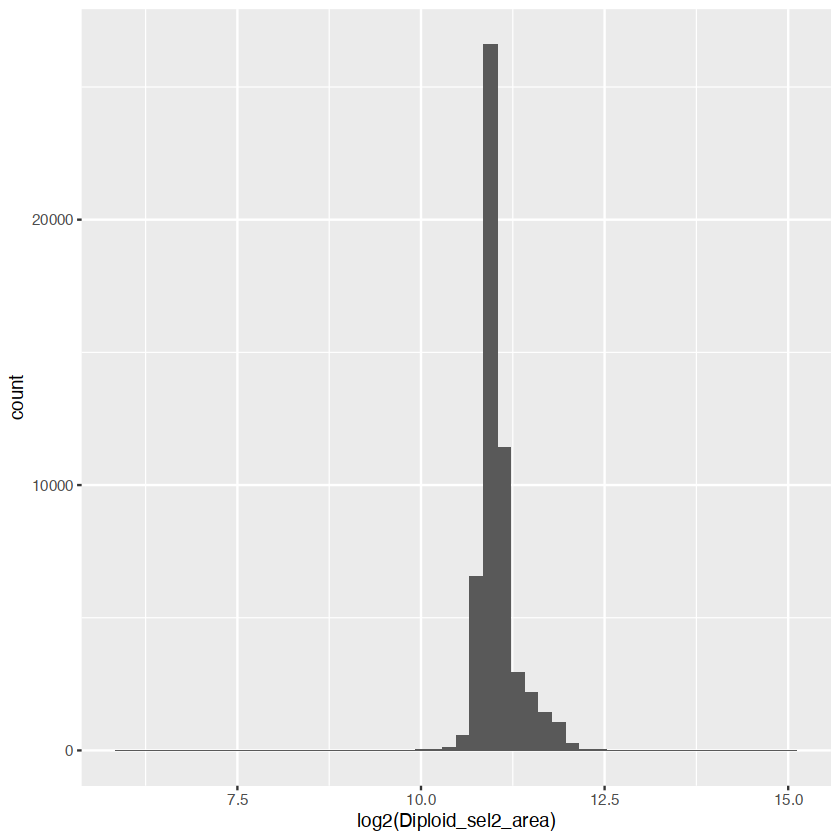

In [3]:
P = ggplot(data=data)+
    geom_histogram(aes(x=log2(Diploid_sel2_area)),bins=50)
P#+geom_vline(xintercept=8,linetype="dashed",color="red")

In [4]:
# Growth in diploid sel2
data_filter = data[data$Diploid_sel2_area > 2**10,]

In [5]:
data_filter$Construct_ID = paste(data_filter$Construct,data_filter$GeneID,data_filter$Miniarray.Gene,sep="." ) 

In [6]:
head(data_filter)

,X,Construct,Tagging,Rep,GeneID,Species,Gene,Pos,Species_position,Miniarray.Gene,Miniarray.ORF,Protein.Removed,Diploid_sel2_area,auc,Construct_ID
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
1,1,pKB11,C,2,21,H. sapiens,CSNK1E,,H. sapiens(CSNK1E),Border,Border,0,3224,76204.0,pKB11.21.Border
2,2,pKB11,C,1,7,S.mikatae,Smik_6.409,A,T.blattae(A),Border,Border,0,3013,79597.5,pKB11.7.Border
3,3,pKB11,C,2,22,H. sapiens,CSNK1A1,,H. sapiens(CSNK1A1),Border,Border,0,2859,64398.5,pKB11.22.Border
4,4,pKB11,C,1,23,H. sapiens,CSNK1D,,H. sapiens(CSNK1D),Border,Border,0,2975,71993.0,pKB11.23.Border
5,5,pKB11,C,2,2,K.africana,KAFR0K00320,A,Z.rouxii(Anc),Border,Border,0,3154,72615.5,pKB11.2.Border
6,6,pKB11,C,1,9,Z.rouxii,ZYRO0G08866g,Anc,N.dairenensis(B),Border,Border,0,3001,74252.0,pKB11.9.Border


In [7]:
data_selected=select(data_filter,Construct_ID,Construct,GeneID,Species,Gene,Pos,Species_position,Miniarray.Gene,Miniarray.ORF,auc,Protein.Removed,Rep)

In [8]:
head(data_selected)

,Construct_ID,Construct,GeneID,Species,Gene,Pos,Species_position,Miniarray.Gene,Miniarray.ORF,auc,Protein.Removed,Rep
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>
1,pKB11.21.Border,pKB11,21,H. sapiens,CSNK1E,,H. sapiens(CSNK1E),Border,Border,76204.0,0,2
2,pKB11.7.Border,pKB11,7,S.mikatae,Smik_6.409,A,T.blattae(A),Border,Border,79597.5,0,1
3,pKB11.22.Border,pKB11,22,H. sapiens,CSNK1A1,,H. sapiens(CSNK1A1),Border,Border,64398.5,0,2
4,pKB11.23.Border,pKB11,23,H. sapiens,CSNK1D,,H. sapiens(CSNK1D),Border,Border,71993.0,0,1
5,pKB11.2.Border,pKB11,2,K.africana,KAFR0K00320,A,Z.rouxii(Anc),Border,Border,72615.5,0,2
6,pKB11.9.Border,pKB11,9,Z.rouxii,ZYRO0G08866g,Anc,N.dairenensis(B),Border,Border,74252.0,0,1


In [9]:
corr_plot_data = data_selected

corr_border_removed  = corr_plot_data[corr_plot_data$Miniarray.ORF !="Border",]
#corr_proteins_removed= corr_border_removed[corr_border_removed$Protein.Removed !=1,]
corr_proteins_removed  = corr_plot_data[corr_plot_data$Miniarray.ORF !="Border",]
corr_Cterm_data =corr_proteins_removed[corr_proteins_removed$Construct=="pKB11",]




In [10]:
corr_Cterm_data = select(corr_Cterm_data,Construct_ID,GeneID,Rep,auc)

In [11]:
corr_Cterm_data_scatter = reshape(corr_Cterm_data, idvar = c("Construct_ID","GeneID"), timevar = "Rep", direction = "wide")

Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“multiple rows match for Rep=1: first taken”
Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
“multiple rows match for Rep=2: first taken”


In [12]:
head(corr_Cterm_data_scatter)

,Construct_ID,GeneID,auc.1,auc.2
,<chr>,<int>,<dbl>,<dbl>
1138,pKB11.21.YMR243C,21,5344.0,3744
1139,pKB11.1.YMR243C,1,4828.0,3667
1140,pKB11.2.YMR243C,2,5486.0,5400
1141,pKB11.25.YMR243C,25,4744.5,6637
1142,pKB11.11.YMR243C,11,5540.0,3799
1143,pKB11.15.YMR243C,15,4343.5,NA


Warning message:
“Removed 7489 rows containing missing values (`geom_point()`).”


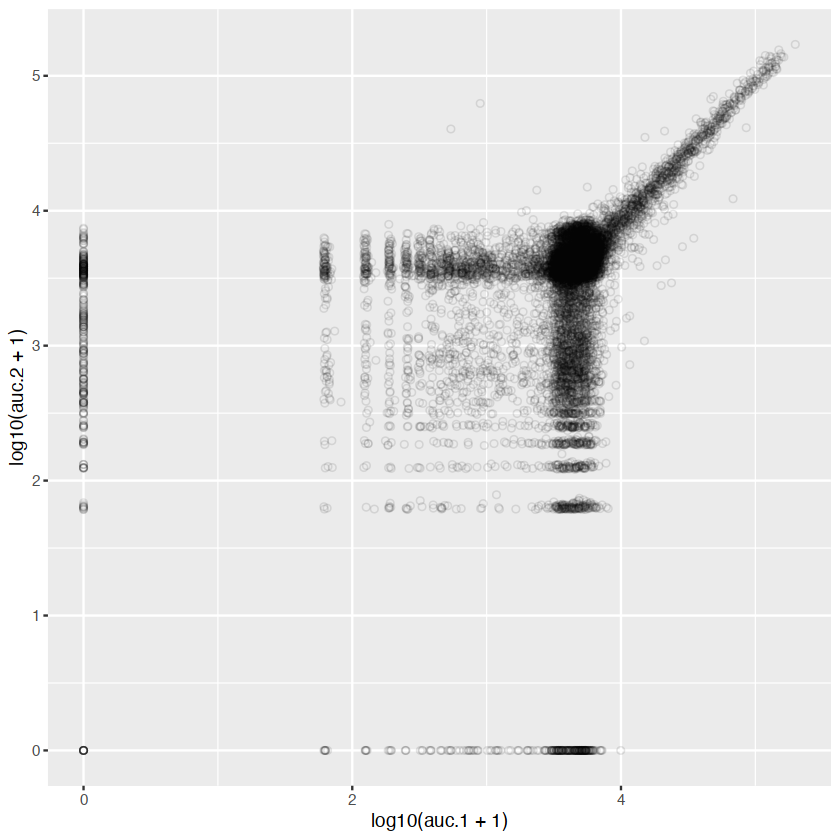

In [13]:
scatter  = 
  ggplot(data=corr_Cterm_data_scatter,
         aes(x=log10(auc.1+1),y=log10(auc.2+1)))+ 
  geom_point(alpha=0.1,color="#000000",shape=1) 
scatter

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
Warning message:
“Removed 7489 rows containing missing values (`geom_point()`).”


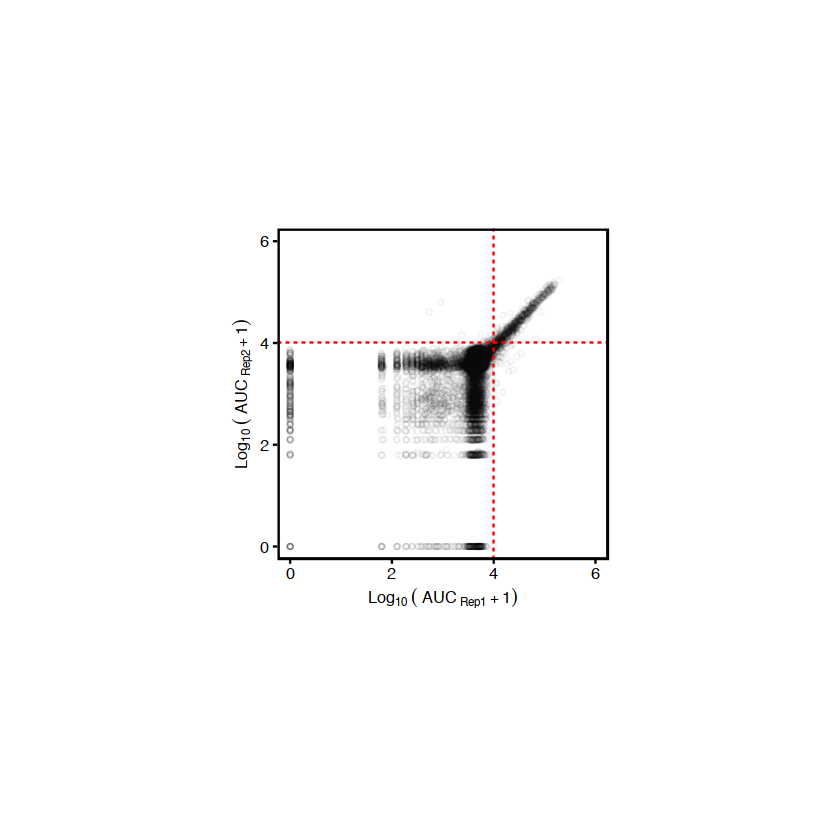

In [14]:
scatter  = 
  ggplot(data=corr_Cterm_data_scatter,
         aes(x=log10(auc.1+1),y=log10(auc.2+1)))+ 
  geom_point(alpha=0.05,color="#000000",shape=1,size=1) + 
  scale_x_continuous(expand=c(0,0),limits=c(-0.25,6.25)) +  
  scale_y_continuous(expand=c(0,0),limits=c(-0.25,6.25))+ 
  theme(
    axis.title=element_text(size=9.5,color="#000000"), 
    legend.position='none',
    legend.key = element_blank(), 
    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
    panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
    panel.spacing = unit(0.75, "lines"),
    panel.background = element_blank(),
    aspect.ratio=1.0,
    axis.ticks =element_line(color = "#000000", size = 0.5),
    axis.text.x = element_text(color="#000000",size=9.5),
    axis.text.y = element_text(color="#000000",size=9.5) ,
    panel.border = element_rect(color="#000000", fill = NA,size=1) 
  )+
  xlab(bquote( Log[10]~(~AUC[~Rep1]+1)))+
  ylab(bquote( Log[10]~(~AUC[~Rep2]+1)))+
geom_hline(yintercept= log10(10**4+1),color = "red",linetype="dashed")+
geom_vline(xintercept= log10(10**4+1),color = "red",linetype="dashed")

p <-set_panel_size(scatter,width  = unit(7, "cm"),height = unit(7, "cm"))
grid.newpage()
grid.draw(p)
ggsave(plot=p,"corr_scater.pdf",height=10,width=10,units = "cm")


In [15]:
data_aggregated = ddply(data_selected,~Construct_ID,summarise,mean=mean(auc),sd=sd(auc), N=length(auc))

In [16]:
head(data_aggregated)
data_aggregated[data_aggregated$Construct_ID =="pKB11.17.YMR243C",]

,Construct_ID,mean,sd,N
,<chr>,<dbl>,<dbl>,<int>
1,pKB11.1.Border,54573.08,16980.11109,466
2,pKB11.1.YAL005C,113026.75,3726.09918,2
3,pKB11.1.YAL029C,4394.25,44.19417,2
4,pKB11.1.YAL042W,889.00,NA,1
5,pKB11.1.YAL047C,4524.50,187.38330,2
6,pKB11.1.YAL061W,1021.50,NA,1


,Construct_ID,mean,sd,N
,<chr>,<dbl>,<dbl>,<int>
7626,pKB11.17.YMR243C,911,NA,1


In [17]:
data_selected_mean <- (merge(data_aggregated, data_selected, by = 'Construct_ID'))

In [18]:
data_selected_mean$auc = NULL
head(data_selected_mean)

,Construct_ID,mean,sd,N,Construct,GeneID,Species,Gene,Pos,Species_position,Miniarray.Gene,Miniarray.ORF,Protein.Removed,Rep
,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,pKB11.1.Border,54573.08,16980.11,466,pKB11,1,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),Border,Border,0,2
2,pKB11.1.Border,54573.08,16980.11,466,pKB11,1,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),Border,Border,0,2
3,pKB11.1.Border,54573.08,16980.11,466,pKB11,1,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),Border,Border,0,1
4,pKB11.1.Border,54573.08,16980.11,466,pKB11,1,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),Border,Border,0,1
5,pKB11.1.Border,54573.08,16980.11,466,pKB11,1,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),Border,Border,0,1
6,pKB11.1.Border,54573.08,16980.11,466,pKB11,1,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),Border,Border,0,1


In [19]:
###########
# Preliminary data analysis

border_removed  = data_selected_mean[data_selected_mean$Miniarray.ORF !="Border",]
proteins_removed= border_removed#border_removed[border_removed$Protein.Removed !=1,]


In [20]:
pKB11 = proteins_removed[proteins_removed$Construct=="pKB11",]

In [21]:
head(pKB11)

,Construct_ID,mean,sd,N,Construct,GeneID,Species,Gene,Pos,Species_position,Miniarray.Gene,Miniarray.ORF,Protein.Removed,Rep
,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
467,pKB11.1.YAL005C,113026.75,3726.09918,2,pKB11,1,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),YAL005C,SSA1,0,2
468,pKB11.1.YAL005C,113026.75,3726.09918,2,pKB11,1,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),YAL005C,SSA1,0,1
469,pKB11.1.YAL029C,4394.25,44.19417,2,pKB11,1,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),YAL029C,MYO4,0,2
470,pKB11.1.YAL029C,4394.25,44.19417,2,pKB11,1,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),YAL029C,MYO4,0,1
471,pKB11.1.YAL042W,889.00,NA,1,pKB11,1,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),YAL042W,ERV46,0,1
472,pKB11.1.YAL047C,4524.50,187.38330,2,pKB11,1,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),YAL047C,SPC72,0,2


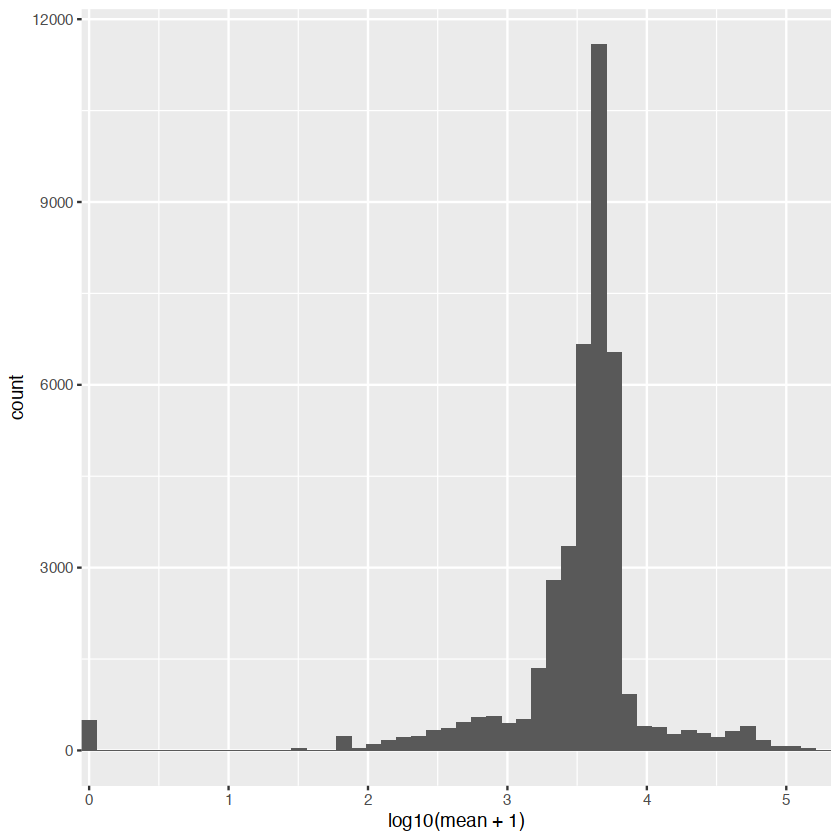

In [22]:
# Distribution of PPI AUCs
P = ggplot(data=pKB11)+
    geom_histogram(aes(x=log10(mean+1)),bins=50)+scale_x_continuous(expand=c(0,0))
P

In [23]:
# Filter out proteins which only gives 2**14 as highest value
threshold = 10**4

In [24]:
# Select ORFs which has at least one interaction (above 2**13.5)
max_areas = ddply(pKB11,~Miniarray.ORF,summarise,max=max(mean))
head(max_areas)

pKB11_max <- (merge( max_areas,pKB11, by = 'Miniarray.ORF'))

,Miniarray.ORF,max
,<chr>,<dbl>
1,AAP1,6314.75
2,AAT2,73574.50
3,ABM1,3432.00
4,ACB1,9658.00
5,ACF2,5829.75
6,ACF4,6504.25


In [25]:
head(pKB11_max)

,Miniarray.ORF,max,Construct_ID,mean,sd,N,Construct,GeneID,Species,Gene,Pos,Species_position,Miniarray.Gene,Protein.Removed,Rep
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,AAP1,6314.75,pKB11.15.YHR047C,2994.5,4234.863,2,pKB11,15,N.castellii,NCAS0D03820,B,T.blattae(B),YHR047C,0,1
2,AAP1,6314.75,pKB11.15.YHR047C,2994.5,4234.863,2,pKB11,15,N.castellii,NCAS0D03820,B,T.blattae(B),YHR047C,0,2
3,AAP1,6314.75,pKB11.3.YHR047C,5016.0,1367.545,2,pKB11,3,T.blattae,TBLA0A02040,A,N.dairenensis(A),YHR047C,0,2
4,AAP1,6314.75,pKB11.10.YHR047C,3329.0,NA,1,pKB11,10,C.glabrata,CAGL0H03553g,B,S.kudriavzevii(A),YHR047C,0,1
5,AAP1,6314.75,pKB11.3.YHR047C,5016.0,1367.545,2,pKB11,3,T.blattae,TBLA0A02040,A,N.dairenensis(A),YHR047C,0,1
6,AAP1,6314.75,pKB11.26.YHR047C,2757.0,3813.427,2,pKB11,26,Vehicle,Vehicle,,Vehicle,YHR047C,0,1


In [26]:
pKB11_max_filter = pKB11_max[pKB11_max$max >= threshold,] 
head(pKB11_max_filter)
print("Number of ORFs with at least 1 interactor above AUC threshold")
length(unique(pKB11_max_filter$Miniarray.ORF))
pKB11_max_filter$Rep= NULL
pKB11_max_filter$max= NULL

output = pKB11_max_filter[!duplicated(pKB11_max_filter), ]
write.csv(pKB11_max_filter,"2023-02-15_DHFR-PCA_HRR25_Cterm_InteractorsFiltered.csv",row.names=FALSE)

,Miniarray.ORF,max,Construct_ID,mean,sd,N,Construct,GeneID,Species,Gene,Pos,Species_position,Miniarray.Gene,Protein.Removed,Rep
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
46,AAT2,73574.5,pKB11.12.YLR027C,51992.75,7006.3675,2,pKB11,12,T.delbrueckii,TDEL0E05230,Anc,T.phaffii(A),YLR027C,0,1
47,AAT2,73574.5,pKB11.24.YLR027C,11554.25,3986.3145,2,pKB11,24,H. sapiens,CSNK1A1L,,H. sapiens(CSNK1A1L),YLR027C,0,1
48,AAT2,73574.5,pKB11.14.YLR027C,29038.75,3331.5336,2,pKB11,14,V.polyspora,Kpol_1002.53,A,N.castellii(A),YLR027C,0,2
49,AAT2,73574.5,pKB11.1.YLR027C,25430.25,3173.1417,2,pKB11,1,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),YLR027C,0,1
50,AAT2,73574.5,pKB11.22.YLR027C,3486.50,1021.7693,2,pKB11,22,H. sapiens,CSNK1A1,,H. sapiens(CSNK1A1),YLR027C,0,1
51,AAT2,73574.5,pKB11.7.YLR027C,10515.75,372.2917,2,pKB11,7,S.mikatae,Smik_6.409,A,T.blattae(A),YLR027C,0,1


[1] "Number of ORFs with at least 1 interactor above AUC threshold"


[1] 116

In [27]:
pKB11_max_filter = read.csv("2023-02-17_DHFR-PCA_HRR25_Cterm_InteractorsFiltered.csv")

In [28]:
head(pKB11_max_filter)

,Miniarray.ORF,Construct_ID,mean,sd,N,Construct,GeneID,MSA_order,Phylo_order,Array_order,Species,Gene,Pos,Species_position,Miniarray.Gene,Protein.Removed
,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,AAT2,pKB11.12.YLR027C,51992.75,7006.3675,2,pKB11,12,6,21,84,T.delbrueckii,TDEL0E05230,Anc,T.phaffii(A),YLR027C,0
2,AAT2,pKB11.24.YLR027C,11554.25,3986.3145,2,pKB11,24,24,25,84,H. sapiens,CSNK1A1L,,H. sapiens(CSNK1A1L),YLR027C,0
3,AAT2,pKB11.14.YLR027C,29038.75,3331.5336,2,pKB11,14,14,14,84,V.polyspora,Kpol_1002.53,A,N.castellii(A),YLR027C,0
4,AAT2,pKB11.1.YLR027C,25430.25,3173.1417,2,pKB11,1,1,2,84,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),YLR027C,0
5,AAT2,pKB11.22.YLR027C,3486.50,1021.7693,2,pKB11,22,22,23,84,H. sapiens,CSNK1A1,,H. sapiens(CSNK1A1),YLR027C,0
6,AAT2,pKB11.7.YLR027C,10515.75,372.2917,2,pKB11,7,3,4,84,S.mikatae,Smik_6.409,A,T.blattae(A),YLR027C,0


In [29]:
# Plot heatmap of relative abundance of barcodes in each condition
heatmap = ggplot(pKB11_max_filter )+   
    geom_tile(aes(Array_order,-Phylo_order,fill = log10(mean+1)))  +
    theme_bw()   + 
    theme( panel.spacing = unit(1, "lines"),
           legend.position='bottom',
           legend.key = element_blank(), 
           strip.background = element_rect(colour="#FFFFFF", color="#FFFFFF",fill="#FFFFFF"),
           panel.border = element_rect(fill=NA, colour = "black", linewidth=1),
           panel.grid.minor = element_blank(),
           panel.grid.major = element_blank(),
           panel.background = element_blank(),
           aspect.ratio=30,
           axis.ticks = element_blank(),
           axis.text.x = element_blank(),
           #axis.text.y = element_blank()    ,
           axis.title =  element_text(size=9.5)       )+
    scale_x_continuous(expand=c(0,0),position = "top",breaks=c(3.5,11.5,18.5,23.5,40.5,54.5,61.5,82.5,92.5,110.5)) + 
    scale_y_continuous(expand=c(0,0)) +
   scale_fill_gradientn(colors=c("#FFFFFF","#FFFFFF","#FFFFFF","#FFFF00","#FF0000","#000000"),na.value="#ababab",limits=c(0,6))+
    ylab("HRR25 orthologs")+
    xlab("ORFs")#+
   # facet_wrap(~Construct,nrow=2)


In [ ]:
 dantheme =  theme_bw()  +  
          theme( panel.spacing = unit(2, "lines"), 
   legend.title.align = 0.5,
                          legend.key = element_blank(),
                          strip.background = element_rect(
　　　　　　　 color="#FFFFFF",fill="#FFFFFF"),
                          panel.border = element_rect(size=1.0),
                          panel.grid.minor = element_blank(),
                          panel.grid.major = element_blank(),
                          panel.background = element_blank(),
                          aspect.ratio=0.4,
                          axis.ticks = element_line(color = "#000000", linewidth = 0.5),
                          axis.text.x = element_blank(),#text(color="#000000",size=9.5, angle = 90,hjust=0),
                          axis.text.x.top = element_text(vjust = 0.5),
                          axis.text.y = element_text(color="#000000",size=9.5),
                          strip.text.y = element_text(size = 9.5, color = "#000000", angle = 270), 
                          strip.text.x = element_text(size = 9.5, color = "#000000", angle = 270),
                          axis.title=element_text(size=9.5, color = "#000000")
)



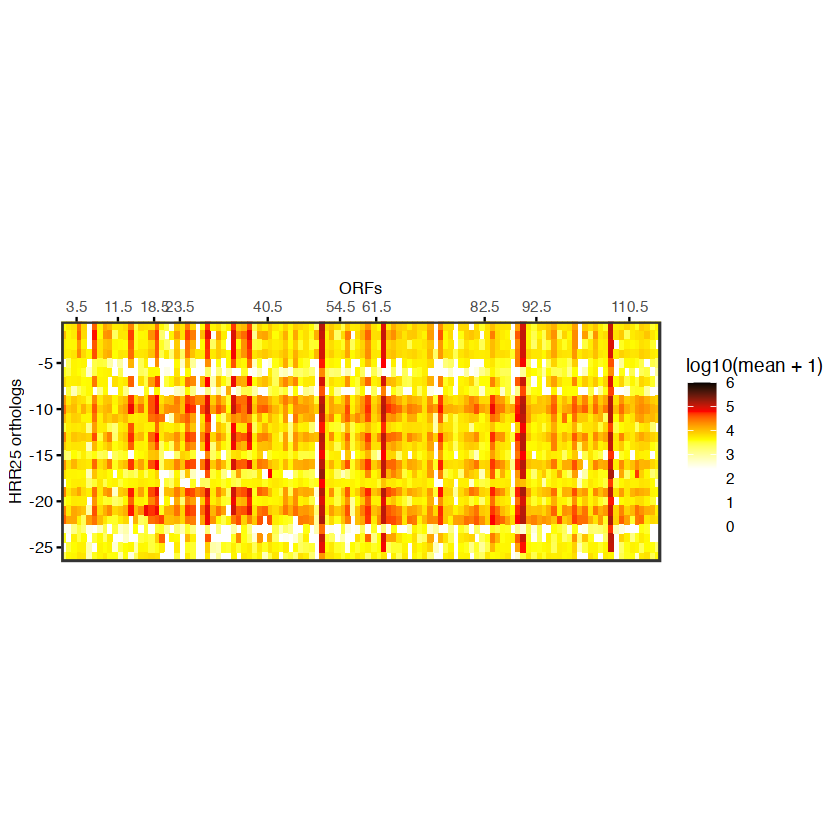

In [ ]:
heatmap+dantheme

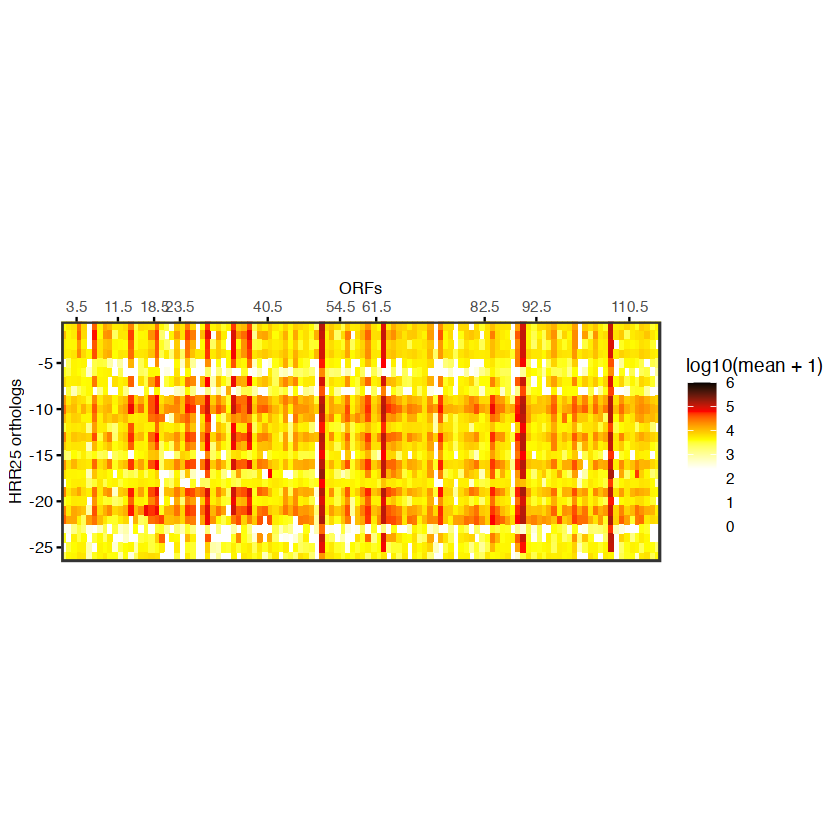

In [ ]:
grid.newpage()
grid.draw(heatmap+dantheme)
ggsave(plot=heatmap+dantheme,"DHFRPCA_heatmap_annotated_20230329.pdf", width=unit(14,"cm"),height=unit(8,"cm"), device = cairo_pdf)


In [ ]:
head(pKB11_max_filter)

,Miniarray.ORF,Construct_ID,mean,sd,N,Construct,GeneID,MSA_order,Phylo_order,Array_order,Species,Gene,Pos,Species_position,Miniarray.Gene,Protein.Removed
,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,AAT2,pKB11.12.YLR027C,51992.75,7006.3675,2,pKB11,12,6,21,84,T.delbrueckii,TDEL0E05230,Anc,T.phaffii(A),YLR027C,0
2,AAT2,pKB11.24.YLR027C,11554.25,3986.3145,2,pKB11,24,24,25,84,H. sapiens,CSNK1A1L,,H. sapiens(CSNK1A1L),YLR027C,0
3,AAT2,pKB11.14.YLR027C,29038.75,3331.5336,2,pKB11,14,14,14,84,V.polyspora,Kpol_1002.53,A,N.castellii(A),YLR027C,0
4,AAT2,pKB11.1.YLR027C,25430.25,3173.1417,2,pKB11,1,1,2,84,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum(A),YLR027C,0
5,AAT2,pKB11.22.YLR027C,3486.50,1021.7693,2,pKB11,22,22,23,84,H. sapiens,CSNK1A1,,H. sapiens(CSNK1A1),YLR027C,0
6,AAT2,pKB11.7.YLR027C,10515.75,372.2917,2,pKB11,7,3,4,84,S.mikatae,Smik_6.409,A,T.blattae(A),YLR027C,0


In [ ]:
ppi_mat_l = pKB11_max_filter %>% select(Miniarray.ORF,mean,Species,Gene,Pos)

ppi_mat_l$ID = paste(ppi_mat_l$Species,ppi_mat_l$Gene,ppi_mat_l$Pos,sep="_")

head(ppi_mat_l)

,Miniarray.ORF,mean,Species,Gene,Pos,ID
,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,AAT2,51992.75,T.delbrueckii,TDEL0E05230,Anc,T.delbrueckii_TDEL0E05230_Anc
2,AAT2,11554.25,H. sapiens,CSNK1A1L,,H. sapiens_CSNK1A1L_
3,AAT2,29038.75,V.polyspora,Kpol_1002.53,A,V.polyspora_Kpol_1002.53_A
4,AAT2,25430.25,S.bayanusvar.uvarum,Suva_16.102,A,S.bayanusvar.uvarum_Suva_16.102_A
5,AAT2,3486.50,H. sapiens,CSNK1A1,,H. sapiens_CSNK1A1_
6,AAT2,10515.75,S.mikatae,Smik_6.409,A,S.mikatae_Smik_6.409_A


In [95]:
ppi_mat_l = ppi_mat_l %>% filter(Miniarray.ORF!="REP2")%>% select(ID,mean,Miniarray.ORF)

In [96]:
ppi_mat = reshape(ppi_mat_l, timevar = "ID", idvar = "Miniarray.ORF", direction = "wide")


In [97]:
head(ppi_mat)

,Miniarray.ORF,mean.T.delbrueckii_TDEL0E05230_Anc,mean.H. sapiens_CSNK1A1L_,mean.V.polyspora_Kpol_1002.53_A,mean.S.bayanusvar.uvarum_Suva_16.102_A,mean.H. sapiens_CSNK1A1_,mean.S.mikatae_Smik_6.409_A,mean.S.kudriavzevii_Skud_16.75_A,mean.K.africana_KAFR0C02290_B,mean.T.blattae_TBLA0A02040_A,⋯,mean.Z.rouxii_ZYRO0G08866g_Anc,mean.K.naganishii_KNAG0F01980_B,mean.C.glabrata_CAGL0H03553g_B,mean.H. sapiens_CSNK1D_,mean.T.phaffii_TPHA0E02830_A,mean.N.castellii_NCAS0A01090_A,mean.K.africana_KAFR0K00320_A,mean.S.cerevisiae_YPL204W_A,mean.T.phaffii_TPHA0J02370_B,mean.H. sapiens_CSNK1E_
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AAT2,51992.75,11554.25,29038.75,25430.25,3486.50,10515.75,10874.50,31605.75,5611.0,⋯,30018.50,54300.25,5738.00,25650.5,51420.00,4659.75,73574.50,10368.75,37832.50,63592.75
27,ADE16,14617.75,3955.00,6174.75,6544.00,NA,5486.00,3683.75,12059.50,3405.5,⋯,4844.50,21369.75,261.25,3976.0,15530.50,766.50,16530.75,4050.00,6562.00,20545.50
51,ADE17,123091.25,68859.50,101763.50,111913.50,1517.75,84481.25,85090.50,109247.50,9658.5,⋯,84828.50,119829.00,63523.75,90357.0,121966.25,NA,133317.00,87078.00,110381.50,115961.75
76,ADE4,39564.50,2139.25,12287.75,12797.00,0.00,8667.00,7354.00,17896.25,5338.5,⋯,6641.25,33053.50,0.00,14641.0,33786.75,264.50,54317.75,5494.00,12588.75,46150.25
101,ADE6,30314.00,3424.75,15818.50,20241.25,3811.25,10264.75,8953.50,20110.00,5624.5,⋯,9864.25,30850.50,5042.00,15083.5,33246.50,2265.50,39574.25,13216.50,23850.75,44305.00
127,ADK1,24516.00,NA,8790.75,10796.50,330.50,5478.25,4971.00,11288.00,NA,⋯,3444.00,23263.50,NA,3856.0,19207.50,3764.50,31274.25,3903.50,6477.25,35436.25


In [98]:
mat_reorder = ppi_mat %>% relocate("mean.S.cerevisiae_YPL204W_A")   %>% replace(is.na(.), 0)

In [99]:
head(mat_reorder)
length(unique(mat_reorder$Miniarray.ORF))

,mean.S.cerevisiae_YPL204W_A,Miniarray.ORF,mean.T.delbrueckii_TDEL0E05230_Anc,mean.H. sapiens_CSNK1A1L_,mean.V.polyspora_Kpol_1002.53_A,mean.S.bayanusvar.uvarum_Suva_16.102_A,mean.H. sapiens_CSNK1A1_,mean.S.mikatae_Smik_6.409_A,mean.S.kudriavzevii_Skud_16.75_A,mean.K.africana_KAFR0C02290_B,⋯,mean.K.naganishii_KNAG0D01130_A,mean.Z.rouxii_ZYRO0G08866g_Anc,mean.K.naganishii_KNAG0F01980_B,mean.C.glabrata_CAGL0H03553g_B,mean.H. sapiens_CSNK1D_,mean.T.phaffii_TPHA0E02830_A,mean.N.castellii_NCAS0A01090_A,mean.K.africana_KAFR0K00320_A,mean.T.phaffii_TPHA0J02370_B,mean.H. sapiens_CSNK1E_
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10368.75,AAT2,51992.75,11554.25,29038.75,25430.25,3486.50,10515.75,10874.50,31605.75,⋯,9509.50,30018.50,54300.25,5738.00,25650.5,51420.00,4659.75,73574.50,37832.50,63592.75
27,4050.00,ADE16,14617.75,3955.00,6174.75,6544.00,0.00,5486.00,3683.75,12059.50,⋯,4199.00,4844.50,21369.75,261.25,3976.0,15530.50,766.50,16530.75,6562.00,20545.50
51,87078.00,ADE17,123091.25,68859.50,101763.50,111913.50,1517.75,84481.25,85090.50,109247.50,⋯,55045.00,84828.50,119829.00,63523.75,90357.0,121966.25,0.00,133317.00,110381.50,115961.75
76,5494.00,ADE4,39564.50,2139.25,12287.75,12797.00,0.00,8667.00,7354.00,17896.25,⋯,7524.50,6641.25,33053.50,0.00,14641.0,33786.75,264.50,54317.75,12588.75,46150.25
101,13216.50,ADE6,30314.00,3424.75,15818.50,20241.25,3811.25,10264.75,8953.50,20110.00,⋯,5851.25,9864.25,30850.50,5042.00,15083.5,33246.50,2265.50,39574.25,23850.75,44305.00
127,3903.50,ADK1,24516.00,0.00,8790.75,10796.50,330.50,5478.25,4971.00,11288.00,⋯,3150.00,3444.00,23263.50,0.00,3856.0,19207.50,3764.50,31274.25,6477.25,35436.25


[1] 115

In [100]:
name = names(mat_reorder)[c(seq(3,27))]

In [101]:
corr_df = data.frame(ortholog=character(),PCC=numeric())

for (ortholog in name){

  corr_val =   cor(mat_reorder[,"mean.S.cerevisiae_YPL204W_A"], mat_reorder[,ortholog], method = 'pearson')

   corr_tmp = data.frame(ortholog=ortholog,PCC=corr_val) 
    
    corr_df = rbind(corr_df,corr_tmp)

}#

In [102]:
write.csv(corr_df,"PPI_corr.csv")

In [2]:
corr_plot_df = read.csv("PPI_corr_plot_stat.csv")

In [3]:
corr_plot_df$State = factor(corr_plot_df$State,levels=c("NonWGD","PostWGD_m","PostWGD_l","Outgroup","Control"))
corr_plot_df$Position = factor(corr_plot_df$Position,levels=c("NonWGD","DupA","DupB","Vehicle","Outgroup"))
head(corr_plot_df%>%filter(ortholog=="Vehicle"))
head(corr_plot_df%>%filter(ortholog!="Vehicle"))

,ortholog,Species,Gene,Position,PCC,Comp,State
,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<fct>
1,Vehicle,Vehicle,Vehicle,Vehicle,0.4405214,0.3921669,Control


,ortholog,Species,Gene,Position,PCC,Comp,State
,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<fct>
1,C.glabrata(B),C.glabrata,CAGL0H03553g,DupB,0.9083006,0.8241210,PostWGD_l
2,H.sapiens(CSNK1A1L),H. sapiens,CSNK1A1L,Outgroup,0.8956619,0.3965887,Outgroup
3,H.sapiens(CSNK1A1),H. sapiens,CSNK1A1,Outgroup,0.6790929,0.4441877,Outgroup
4,H.sapiens(CSNK1D),H. sapiens,CSNK1D,Outgroup,0.8922659,0.4024958,Outgroup
5,H.sapiens(CSNK1E),H. sapiens,CSNK1E,Outgroup,0.8199606,0.3847773,Outgroup
6,K.africana(A),K.africana,KAFR0K00320,DupA,0.8673020,0.8491312,PostWGD_m


In [4]:
corr_plot_df

ortholog,Species,Gene,Position,PCC,Comp,State
<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>,<fct>
C.glabrata(B),C.glabrata,CAGL0H03553g,DupB,0.9083006,0.8241210,PostWGD_l
H.sapiens(CSNK1A1L),H. sapiens,CSNK1A1L,Outgroup,0.8956619,0.3965887,Outgroup
H.sapiens(CSNK1A1),H. sapiens,CSNK1A1,Outgroup,0.6790929,0.4441877,Outgroup
H.sapiens(CSNK1D),H. sapiens,CSNK1D,Outgroup,0.8922659,0.4024958,Outgroup
H.sapiens(CSNK1E),H. sapiens,CSNK1E,Outgroup,0.8199606,0.3847773,Outgroup
K.africana(A),K.africana,KAFR0K00320,DupA,0.8673020,0.8491312,PostWGD_m
K.africana(B),K.africana,KAFR0C02290,DupB,0.8869490,0.9115596,PostWGD_m
K.naganishii(A),K.naganishii,KNAG0D01130,DupA,0.8791235,0.9084874,PostWGD_m
K.naganishii(B),K.naganishii,KNAG0F01980,DupB,0.9021108,0.9303078,PostWGD_m


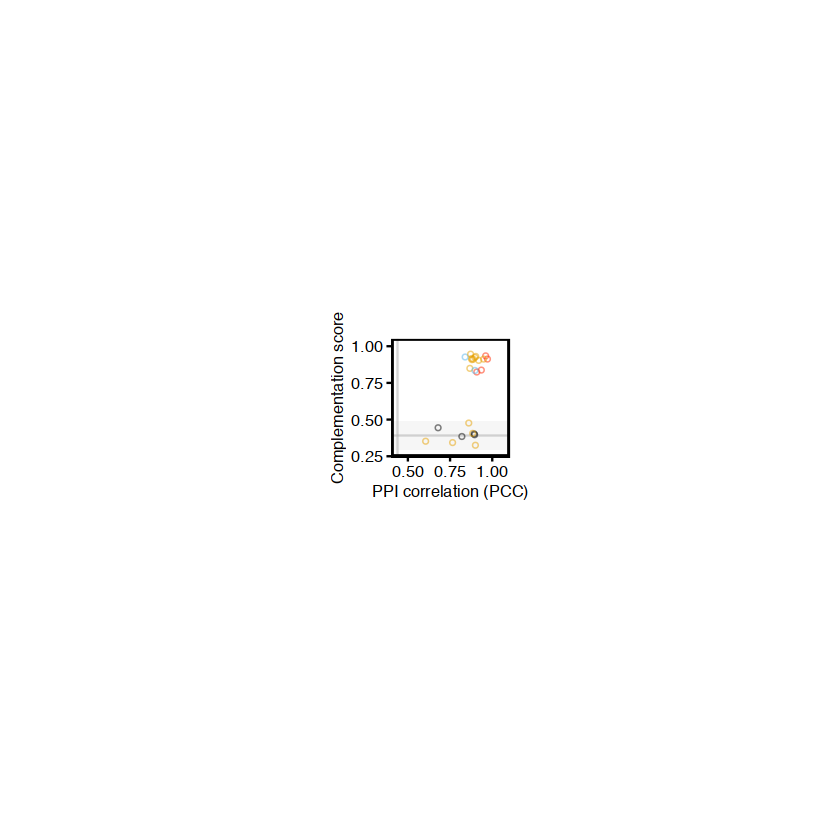

In [13]:
#corr_plot_df


# scatter plot, PCC, R, P-value
# change point by State
dat = corr_plot_df%>%filter(ortholog!="Vehicle")

scatter  = 
  ggplot(data=dat,
         aes(x=PCC,y=Comp,color=State))+ 
    geom_hline(yintercept= 0.39216686,color = "#ababab",alpha=0.5)+
      annotate('rect', xmin=0.4, xmax=1.1, ymin=0.39216686-2*(0.048384324), ymax=0.39216686+2*(0.048384324), alpha=.1, fill='#ababab')+
    geom_vline(xintercept= 0.4405214,color = "#ababab",alpha=0.5)+
  geom_point(alpha=0.5,size=1,shape=1) + 
  scale_x_continuous(expand=c(0,0),limits=c(0.4,1.1),breaks=c(0,0.25,0.5,0.75,1.0)) +  
  scale_y_continuous(expand=c(0,0),limits=c(0.245,1.05),breaks=c(0,0.25,0.5,0.75,1.0))+ 
  theme(
    axis.title=element_text(size=9.5,color="#000000"), 
    legend.position='none',
    legend.key = element_blank(), 
    strip.background = element_rect(color="#FFFFFF",fill="#FFFFFF"),
    panel.grid.minor = element_blank(),panel.grid.major = element_blank(),
    panel.spacing = unit(0.75, "lines"),
    panel.background = element_blank(),
    aspect.ratio=1.0,
    axis.ticks =element_line(color = "#000000", size = 0.5),
    axis.text.x = element_text(color="#000000",size=9.5),
    axis.text.y = element_text(color="#000000",size=9.5) ,
    panel.border = element_rect(color="#000000", fill = NA,size=1) 
  )+
  xlab(bquote( "PPI correlation (PCC)"))+
  ylab(bquote( "Complementation score"))+
 #scale_shape_manual(values=c("NonWGD"=1,"PostWGD"=2,"Outgroup"=4))+
  scale_color_manual(values=c('PostWGD_l'="#FF2600",'PostWGD_m'="#E69F00",'NonWGD'="#56B4E9",'Outgroup'="#000000"))

p <-set_panel_size(scatter,width  = unit(2.5, "cm"),height = unit(2.5, "cm"))
grid.newpage()
grid.draw(p)
ggsave(plot=p,"PPIcorrVSCompelemtation_scater_v20230811.pdf",height=5,width=5,units = "cm")



In [11]:
cor.test(dat$PCC, dat$Comp, method = 'pearson')


	Pearson's product-moment correlation

data:  dat$PCC and dat$Comp
t = 3.0937, df = 22, p-value = 0.005303
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1892263 0.7806111
sample estimates:
      cor 
0.5505943 
